# Project: Soccer Database Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project I will be analyzing data associated with matches and teams for European Professional Football from 2008 to 2016. In particular, I am interested in finding the top five and last three teams per country and share their performance. The columns I have as they are from the database are:
    - name of the country: `country`;
    - name of the league: `league`;
    - years of the season: `match_season`.
From the database I had the information about each  match from league and the number of goals each team gave. You can download the SQL script I used for this analysis from the **Resources** link or from <a href="matches.sql">here</a>. Therefore,  I calculated for each team per match season: 
    - the total number of game played: `game_played`;
    - total number of points: `points`;
    - how many games they won: `won`;
    - how many games ended up with a tie: `draw`;
    - how many games they lost: `lost`;
    - the number of goals they scored: `goals_scored`;
    - the number of goals they received: `goals_conceded`;
    - and the difference between the number of goals they scored and they received: `goals difference`.  
    
## Questions

Fist, I have to mention that I also visualised data for the last three teams for later analysis. But for now I will deal only with top five performers. Second, I used case studies for each part: Belgium and Italy.

**Q1:** I have a main question to answer: “What teams improved the most over the time period?”. I am interested in the top five teams for each match season for each country. 
In order to answer this main question I have to first find the top five teams per country per match season and visualize in a bar chart the number of points and goals difference for each team. For that reason, I have to answer another question.

**Q2:** Which are the top five teams or top performers over the years, per country?

In order to answer this question I followed the next steps:
    1. I filtered the data by country.
    2. I got the data for top five teams.
    3. I visualized the data with a bar chart for both number of points and goal difference.

In order to answer my main question I used all the top five teams over and plotted their number of points over the years per country. I followed these steps:
    1. I got the the top five teams per country;
    2. I got the data for the top five teams per country: number of points and match season;
    3. I plotted the line for each team per country;
    4. To be able to compare how they performed I plotted a line chart with all top five teams. 

**Resources:**
1. SQL Query: <a href="matches.sql">Here</a>
1. Dataset: [here](https://www.kaggle.com/hugomathien/soccer)
2. Stats Tables: [here](https://www.fctables.com/belgium/jupiler-league/2008_2009/)
3. Premier League Tables: [here](https://www.premierleague.com/tables?co=1&se=79&ha=-1)

<a id='wrangling'></a>
## Data Wrangling

Getting the data I need in three steps:
1. Gather 
2. Assess
3. Cleaning

## #1. Gather the Data

In [1]:
import numpy as np
import pandas as pd
#import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
% matplotlib inline

## Connecting to the Database and Loading the Data

In [2]:
# # path to the database
# database = 'database.sqlite'

# # connection to database
# connection = sqlite3.connect(database)

# # read sql file
# query = open('matches.sql', 'r')
# df_matches = pd.read_sql_query(query.read(), connection)

## save the the data into a csv file
#df_matches.to_csv('matches.csv', index=False)

# load the data from csv file
df_matches = pd.read_csv('df_matches.csv')

# view the first rows from the dataset
df_matches.head()

,country,league,match_season,team,game_played,points,won,draw,lost,goals_scored,goals_conceded,goals_difference
0,Belgium,Belgium Jupiler League,2015/2016,Club Brugge KV,30,64,21,1,8,64,30,34
1,Belgium,Belgium Jupiler League,2015/2016,KAA Gent,30,60,17,9,4,56,29,27
2,Belgium,Belgium Jupiler League,2015/2016,RSC Anderlecht,30,55,15,10,5,51,29,22
3,Belgium,Belgium Jupiler League,2015/2016,KV Oostende,30,49,14,7,9,55,44,11
4,Belgium,Belgium Jupiler League,2015/2016,KRC Genk,30,48,14,6,10,42,30,12


## #2 Assesing Data

General properties of the dataset:
    - number of samples in dataset: 
        - 1478
    - number of columns in dataset: 
        - 12
    - duplicate rows in each dataset: 
        - 0
    - datatypes of columns: 
        - all the numeric data is integer and the rest is string: 
    - features with missing values: 
        - no missing values
    - number of non-null unique values for features in each dataset:
        - 11 countries              
        - 11 leagues               
        - 8 match seasons
        - 296 teams
    - describe the dataset:
        - the count, mean, standard deviation and the 5 number summary for each column.

In [3]:
# number of samples and columns
df_matches.shape

(1478, 12)

In [4]:
# check for duplicates
sum(df_matches.duplicated())

0

In [5]:
# check the datatypes
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1478 entries, 0 to 1477
Data columns (total 12 columns):
country             1478 non-null object
league              1478 non-null object
match_season        1478 non-null object
team                1478 non-null object
game_played         1478 non-null int64
points              1478 non-null int64
won                 1478 non-null int64
draw                1478 non-null int64
lost                1478 non-null int64
goals_scored        1478 non-null int64
goals_conceded      1478 non-null int64
goals_difference    1478 non-null int64
dtypes: int64(8), object(4)
memory usage: 138.6+ KB


In [6]:
# check for missing values
df_matches.isnull().sum()

country             0
league              0
match_season        0
team                0
game_played         0
points              0
won                 0
draw                0
lost                0
goals_scored        0
goals_conceded      0
goals_difference    0
dtype: int64

In [7]:
# non-null unique values
df_matches.nunique()

country              11
league               11
match_season          8
team                296
game_played          10
points               87
won                  33
draw                 21
lost                 31
goals_scored         94
goals_conceded       78
goals_difference    131
dtype: int64

In [8]:
# describe the dataset
df_matches.describe()

,game_played,points,won,draw,lost,goals_scored,goals_conceded,goals_difference
count,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000
mean,35.154263,48.268606,13.114344,8.925575,13.114344,47.555480,47.555480,0.000000
std,3.731767,16.051381,5.566954,2.934608,5.166010,15.895455,13.116502,23.510639
min,6.000000,4.000000,1.000000,0.000000,0.000000,5.000000,1.000000,-61.000000
25%,34.000000,37.000000,9.000000,7.000000,10.000000,37.000000,39.000000,-16.000000
50%,36.000000,45.000000,12.000000,9.000000,13.000000,45.000000,48.000000,-4.000000
75%,38.000000,58.000000,16.000000,11.000000,17.000000,55.000000,56.000000,12.000000
max,60.000000,102.000000,33.000000,21.000000,30.000000,121.000000,98.000000,89.000000


## #3 Cleaning the Data

    - Check if the number of games each team played is consistent for each match.
    - I can see from the describe table that there is a maximum of 60 games played and the third Quartile value is 38 so I am going to look for higher values.

### Inconsistent data for the following Poland seasons, teams:
    - Match season 2008/2009, team Polonia Bytom 60
    - Match season 2010/2011, team Polonia Bytom 60
    - Match season 2011/2012, team Widzew Łódź 60

In [9]:
# games per country, per match_season, per team
game_played = df_matches.groupby(['country', 'match_season', 'team']).sum().game_played
game_played

country      match_season  team                   
Belgium      2008/2009     Beerschot AC               34
                           Club Brugge KV             34
                           FCV Dender EH              34
                           KAA Gent                   34
                           KRC Genk                   34
                           KSV Cercle Brugge          34
                           KSV Roeselare              34
                           KV Kortrijk                34
                           KV Mechelen                34
                           KVC Westerlo               34
                           RAEC Mons                  34
                           RSC Anderlecht             34
                           Royal Excel Mouscron       34
                           SV Zulte-Waregem           34
                           Sporting Charleroi         34
                           Sporting Lokeren           34
                           Standard d

In [10]:
# view the teams where the number of games they played is higher than 75%
game_played[game_played>38]

country  match_season  team         
Poland   2008/2009     Polonia Bytom    60
         2010/2011     Polonia Bytom    60
         2011/2012     Widzew Łódź      60
Name: game_played, dtype: int64

In [11]:
# see the data with incorrect values
df_matches.query('(team == "Polonia Bytom" and (match_season == "2010/2011" or match_season == "2008/2009")) or (team == "Widzew Łódź" and match_season == "2011/2012")')

,country,league,match_season,team,game_played,points,won,draw,lost,goals_scored,goals_conceded,goals_difference
949,Poland,Poland Ekstraklasa,2011/2012,Widzew Łódź,60,63,14,21,25,48,79,-31
964,Poland,Poland Ekstraklasa,2010/2011,Polonia Bytom,60,72,19,15,26,65,85,-20
996,Poland,Poland Ekstraklasa,2008/2009,Polonia Bytom,60,64,17,13,30,50,79,-29


### Make the changes in the dataset

In [12]:
# change the number of game played
df_matches.loc[949, 'game_played'] = 30
df_matches.loc[964, 'game_played'] = 30
df_matches.loc[996, 'game_played'] = 30

# change the number of points
df_matches.loc[949, 'points'] = 39
df_matches.loc[964, 'points'] = 27
df_matches.loc[996, 'points'] = 35

# change the number of games they won
df_matches.loc[949, 'won'] = 9
df_matches.loc[964, 'won'] = 6
df_matches.loc[996, 'won'] = 10

# change the number of draw games 
df_matches.loc[949, 'draw'] = 12
df_matches.loc[964, 'draw'] = 9
df_matches.loc[996, 'draw'] = 5

# change the number of games they lost
df_matches.loc[949, 'lost'] = 9
df_matches.loc[964, 'lost'] = 15
df_matches.loc[996, 'lost'] = 15

# change the number of goals scored 
df_matches.loc[949, 'goals_scored'] = 25
df_matches.loc[964, 'goals_scored'] = 29
df_matches.loc[996, 'goals_scored'] = 30

# change the number of goals conceded
df_matches.loc[949, 'goals_conceded'] = 26
df_matches.loc[964, 'goals_conceded'] = 45
df_matches.loc[996, 'goals_conceded'] = 46

# change the number of goals difference
df_matches.loc[949, 'goals_difference'] = -1
df_matches.loc[964, 'goals_difference'] = -16
df_matches.loc[996, 'goals_difference'] = -16

# chack again to see the right values
df_matches.query('(team == "Polonia Bytom" and (match_season == "2010/2011" or match_season == "2008/2009")) or (team == "Widzew Łódź" and match_season == "2011/2012")')

,country,league,match_season,team,game_played,points,won,draw,lost,goals_scored,goals_conceded,goals_difference
949,Poland,Poland Ekstraklasa,2011/2012,Widzew Łódź,30,39,9,12,9,25,26,-1
964,Poland,Poland Ekstraklasa,2010/2011,Polonia Bytom,30,27,6,9,15,29,45,-16
996,Poland,Poland Ekstraklasa,2008/2009,Polonia Bytom,30,35,10,5,15,30,46,-16


In [13]:
# save the changes datasets to csv
df_matches.to_csv('matches.csv', index=False)

In [14]:
# load dataset
df_matches = pd.read_csv('matches.csv')
df_matches.head()

,country,league,match_season,team,game_played,points,won,draw,lost,goals_scored,goals_conceded,goals_difference
0,Belgium,Belgium Jupiler League,2015/2016,Club Brugge KV,30,64,21,1,8,64,30,34
1,Belgium,Belgium Jupiler League,2015/2016,KAA Gent,30,60,17,9,4,56,29,27
2,Belgium,Belgium Jupiler League,2015/2016,RSC Anderlecht,30,55,15,10,5,51,29,22
3,Belgium,Belgium Jupiler League,2015/2016,KV Oostende,30,49,14,7,9,55,44,11
4,Belgium,Belgium Jupiler League,2015/2016,KRC Genk,30,48,14,6,10,42,30,12


## Check if the changes are correct

In [15]:
# games per country, per match_season, per team
game_played = df_matches.groupby(['country', 'match_season', 'team']).sum().game_played
# check if  the number of games played is consistent
game_played[game_played>38]

Series([], Name: game_played, dtype: int64)

### Not enough data for the Belgium Match Season 2013/2014  
    - Data for only 4 teams;

In order to clean the data I will:
    - drop the rows fro the Belgium Match Season 2013/2014  
    - append correct data to the data frame

In [16]:
pd.set_option('display.max_rows', 5400)
match_teams = df_matches.groupby(['country', 'match_season'], as_index=False).count().loc[:,['country', 'match_season', 'team']]
match_teams.head()

,country,match_season,team
0,Belgium,2008/2009,18
1,Belgium,2009/2010,15
2,Belgium,2010/2011,16
3,Belgium,2011/2012,16
4,Belgium,2012/2013,16


In [17]:
# check if the number of teams in match season is consistent
match_teams[match_teams['team'] < 10]

,country,match_season,team
5,Belgium,2013/2014,4


In [18]:
# drop the rows with Belgium data for 2013/2014 match_season
df_matches.drop(df_matches.query('country == "Belgium" and match_season == "2013/2014"').index, inplace=True)
df_matches.shape

(1474, 12)

In [19]:
df_matches.head(1)

,country,league,match_season,team,game_played,points,won,draw,lost,goals_scored,goals_conceded,goals_difference
0,Belgium,Belgium Jupiler League,2015/2016,Club Brugge KV,30,64,21,1,8,64,30,34


### Upload dataset for Belgium Jupiler League 2013/2014

- The data will be appended to the Data Frame
- The data can be found [here](https://www.fctables.com/belgium/jupiler-league/2013_2014/)

In [20]:
# upload correct dataset for belgium
df_belgium_2013_2014 = pd.read_csv('belgium_2013_2014.csv')
df_belgium_2013_2014

,country,league,match_season,team,game_played,points,won,draw,lost,goals_scored,goals_conceded,goals_difference
0,Belgium,Belgium Jupiler League,2013/2014,Standard de Liège,30,67,20,7,3,59,17,42
1,Belgium,Belgium Jupiler League,2013/2014,Club Brugge KV,30,63,19,6,5,54,28,26
2,Belgium,Belgium Jupiler League,2013/2014,RSC Anderlecht,30,57,18,3,9,61,31,30
3,Belgium,Belgium Jupiler League,2013/2014,SV Zulte-Waregem,30,53,14,11,5,51,38,13
4,Belgium,Belgium Jupiler League,2013/2014,Sporting Lokeren,30,51,15,6,9,48,31,17
5,Belgium,Belgium Jupiler League,2013/2014,KRC Genk,30,45,14,3,13,42,39,3
6,Belgium,Belgium Jupiler League,2013/2014,KAA Gent,30,44,12,8,10,39,37,2
7,Belgium,Belgium Jupiler League,2013/2014,KV Kortrijk,30,39,10,9,11,42,44,-2
8,Belgium,Belgium Jupiler League,2013/2014,Sporting Charleroi,30,34,8,10,12,36,41,-5
9,Belgium,Belgium Jupiler League,2013/2014,KV Oostende,30,34,9,7,14,28,46,-18


### Combine the two Dataframes

In [21]:
# combine the two dataframes 
df = pd.concat([df_matches, df_belgium_2013_2014])

# save the datasets to csv
df.to_csv('matches.csv', index=False)
df = pd.read_csv('matches.csv')

# view the first rows of the dataset
df.head()

,country,league,match_season,team,game_played,points,won,draw,lost,goals_scored,goals_conceded,goals_difference
0,Belgium,Belgium Jupiler League,2015/2016,Club Brugge KV,30,64,21,1,8,64,30,34
1,Belgium,Belgium Jupiler League,2015/2016,KAA Gent,30,60,17,9,4,56,29,27
2,Belgium,Belgium Jupiler League,2015/2016,RSC Anderlecht,30,55,15,10,5,51,29,22
3,Belgium,Belgium Jupiler League,2015/2016,KV Oostende,30,49,14,7,9,55,44,11
4,Belgium,Belgium Jupiler League,2015/2016,KRC Genk,30,48,14,6,10,42,30,12


In [22]:
# cheack if the data is appended
match_teams = df.groupby(['country', 'match_season'], as_index=False).count().loc[:,['country', 'match_season', 'team']]
match_teams[match_teams['team'] < 10].count()

country         0
match_season    0
team            0
dtype: int64

### Assesing the shape of the new data frame 
    - number of samples: 1494 
    - number of columns: 12
    - describe the dataset:
        - the count, mean, standard deviation and the 5 number summary for each column.

In [23]:
df.shape

(1490, 12)

In [24]:
df.describe()

,game_played,points,won,draw,lost,goals_scored,goals_conceded,goals_difference
count,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000
mean,35.116779,48.236242,13.108054,8.912081,13.096644,47.532886,47.501342,0.031544
std,3.259504,15.917788,5.541322,2.892927,5.100869,15.770195,12.884372,23.480377
min,18.000000,14.000000,3.000000,0.000000,0.000000,17.000000,13.000000,-61.000000
25%,34.000000,37.000000,9.000000,7.000000,10.000000,37.000000,39.000000,-16.000000
50%,36.000000,45.000000,12.000000,9.000000,13.000000,45.000000,48.000000,-4.000000
75%,38.000000,57.000000,16.000000,11.000000,17.000000,55.000000,56.000000,12.000000
max,38.000000,102.000000,33.000000,19.000000,29.000000,121.000000,98.000000,89.000000


In [25]:
# how many points each team got per country, per season match
df.groupby(['country', 'league', 'match_season']).count().head()

team  game_played  points  won  \
country league                 match_season                                   
Belgium Belgium Jupiler League 2008/2009       18           18      18   18   
                               2009/2010       15           15      15   15   
                               2010/2011       16           16      16   16   
                               2011/2012       16           16      16   16   
                               2012/2013       16           16      16   16   

                                             draw  lost  goals_scored  \
country league                 match_season                             
Belgium Belgium Jupiler League 2008/2009       18    18            18   
                               2009/2010       15    15            15   
                               2010/2011       16    16            16   
                               2011/2012       16    16            16   
                               2012/2013       16    16            16   

                                             goals_conceded  goals_difference  
country league                 match_season                                    
Belgium Belgium Jupiler League 2008/2009                 18                18  
                               2009/2010                 15                15  
                               2010/2011                 16                16  
                               2011/2012                 16                16  
                               2012/2013                 16                16

<a id='eda'></a>
## Exploratory Data Analysis

### Which are the top five teams or top performers over the years, per country?

### Let’s visualize the information in our dataset by finding correlation between our variables and see how the data is distributed.

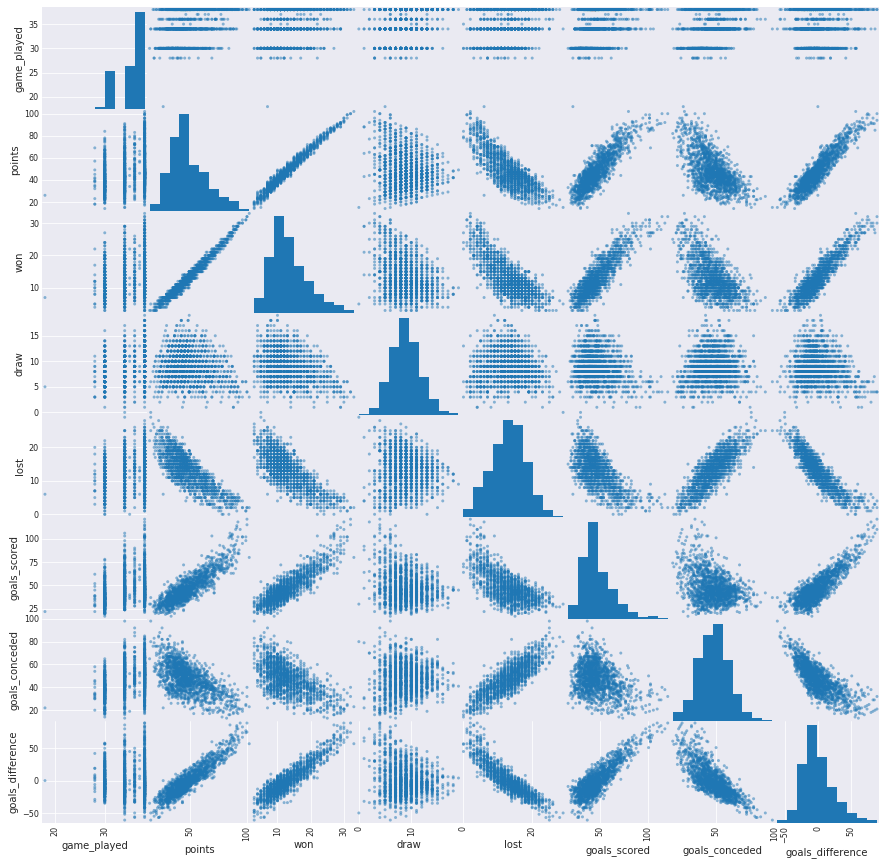

In [28]:
pd.plotting.scatter_matrix(df, figsize=(15,15));

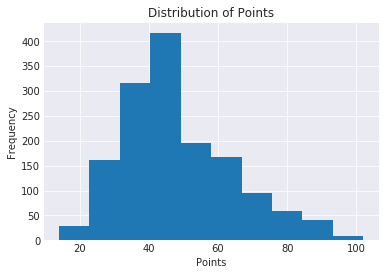

In [29]:
# plot the points histogram

plt.hist(df['points'])
plt.title('Distribution of Points')
plt.xlabel('Points')
plt.ylabel('Frequency')

plt.show;

This histogram shows the distribution of points from all the dataset. We can see the distribution is right skewed with data ranging from 14 to 102. The bin with the highest frequency ranges from 40 to 50 points.

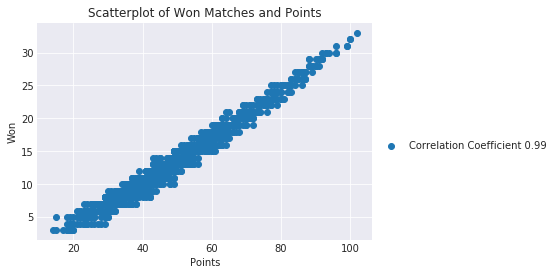

In [30]:
# calculate the correlation coefficient
corr = np.round(df['points'].corr(df['won']), decimals=2)

# plot the scatter
plt.scatter(df['points'], df['won'], label="Correlation Coefficient {}".format(corr));
plt.title('Scatterplot of Won Matches and Points')
plt.xlabel('Points')
plt.ylabel('Won')

plt.legend()
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.show();

With a correlation coefficient of `0.99`, this scatter plot shows a strong, positive, linear relationship between won matches and how many points a team got. This means that if a team wins more games, it receives more points.   

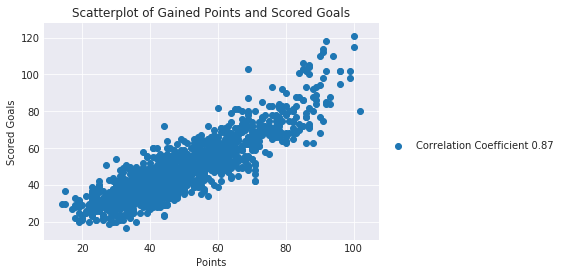

In [31]:
df.plot(x='points', y='goals_scored', kind='scatter');

# calculate the correlation coefficient
corr = np.round(df['points'].corr(df['goals_scored']), decimals=2)

# plot the scatter
plt.scatter(df['points'], df['goals_scored'], label="Correlation Coefficient {}".format(corr));
plt.title('Scatterplot of Gained Points and Scored Goals')
plt.xlabel('Points')
plt.ylabel('Scored Goals')
plt.legend()
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.show();

With a correlation coefficient of `0.87`, this scatter plot shows a strong, positive, linear relationship between how many goals a team scored and how many points a team got. This means that if a team scores many goals, it receives more points.  

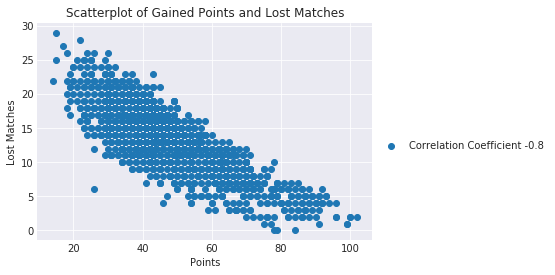

In [32]:
# calculate the correlation coefficient
corr = np.round(df['points'].corr(df['lost']), decimals=2)

# plot the scatter
plt.scatter(df['points'], df['lost'], label="Correlation Coefficient {}".format(corr));
plt.title('Scatterplot of Gained Points and Lost Matches')
plt.xlabel('Points')
plt.ylabel('Lost Matches')
plt.legend()
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.show();

With a correlation coefficient of `-0.8`, this scatter plot shows a strong, negative, linear relationship between how many matches a team lost and how many points a team got. This means that if a team losses many games, it receives fewer points.   

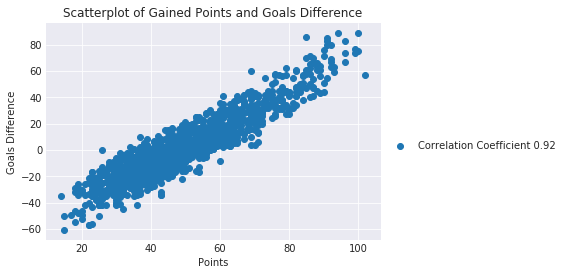

In [33]:
# calculate the correlation coefficient
corr = np.round(df['points'].corr(df['goals_difference']), decimals=2)

# plot the scatter
plt.scatter(df['points'], df['goals_difference'], label="Correlation Coefficient {}".format(corr));
plt.title('Scatterplot of Gained Points and Goals Difference')
plt.xlabel('Points')
plt.ylabel('Goals Difference')
plt.legend()
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.show();

With a correlation coefficient of `0.92`, this scatter plot shows a strong, positive, linear relationship between the difference between goals scored and goals conceded (`goals_difference`) and how many points a team got. This means that if the difference between goals scored and goals received is bigger, than the team receives more points.   

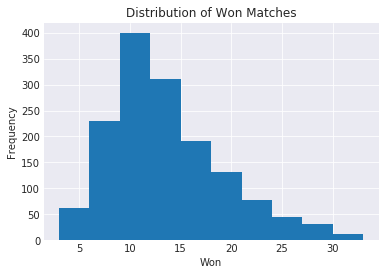

In [34]:
# plot the won matches histogram
plt.hist(df['won'])
plt.title('Distribution of Won Matches')
plt.xlabel('Won')
plt.ylabel('Frequency')

plt.show;

This histogram shows the distribution of won matches from all the dataset. We can see the distribution is right skewed with data ranging from 3 to 33. 

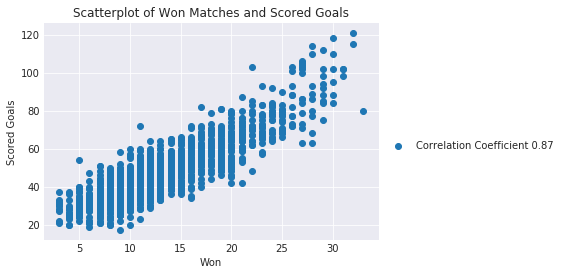

In [35]:
# calculate the correlation coefficient
corr = np.round(df['won'].corr(df['goals_scored']), decimals=2)

# plot the scatter
plt.scatter(df['won'], df['goals_scored'], label="Correlation Coefficient {}".format(corr));
plt.title('Scatterplot of Won Matches and Scored Goals')
plt.xlabel('Won')
plt.ylabel('Scored Goals')
plt.legend()
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.show();

With a correlation coefficient of `0.87`, this scatter plot shows a strong, positive, linear relationship between how many goals a team scored and how many matches a team won. This means that if a team scores many goals, it wins more matches.

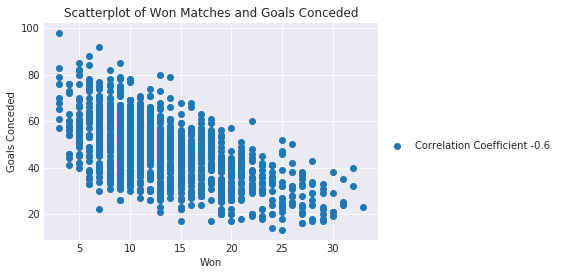

In [36]:
# calculate the correlation coefficient
corr = np.round(df['won'].corr(df['goals_conceded']), decimals=2)

# plot the scatter
plt.scatter(df['won'], df['goals_conceded'], label="Correlation Coefficient {}".format(corr));
plt.title('Scatterplot of Won Matches and Goals Conceded')
plt.xlabel('Won')
plt.ylabel('Goals Conceded')
plt.legend()
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.show();

With a correlation coefficient of `-0.6`, this scatter plot shows a moderate, negative, linear relationship between how many goals a team received and how many matches a team won. 

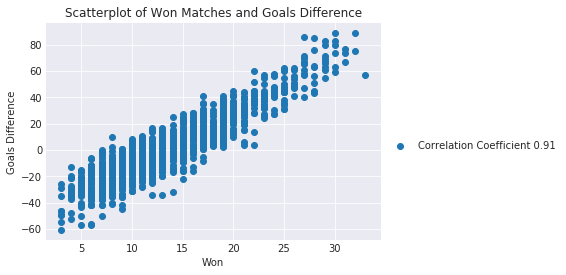

In [37]:
# calculate the correlation coefficient
corr = np.round(df['won'].corr(df['goals_difference']), decimals=2)

# plot the scatter
plt.scatter(df['won'], df['goals_difference'], label="Correlation Coefficient {}".format(corr));
plt.title('Scatterplot of Won Matches and Goals Difference')
plt.xlabel('Won')
plt.ylabel('Goals Difference')
plt.legend()
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.show();

With a correlation coefficient of `0.91`, this scatter plot shows a strong, positive, linear relationship between goals difference and how many matches a team won. This means that if the goals difference is bigger, it wins more matches. 

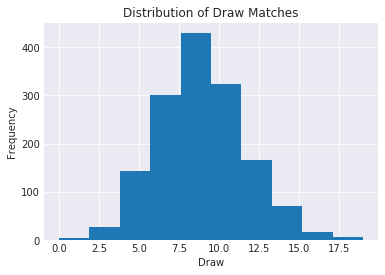

In [38]:
# plot the draw matches histogram
plt.hist(df['draw'])
plt.title('Distribution of Draw Matches')
plt.xlabel('Draw')
plt.ylabel('Frequency')

plt.show;

This histogram shows the distribution of draw matches from all the dataset. We can see the distribution is normally distributed with data ranging from 0 to 19.  

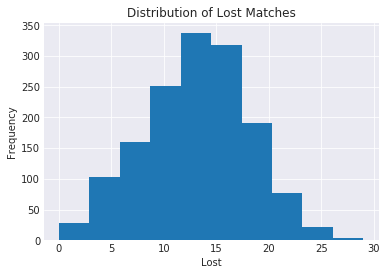

In [39]:
# plot the draw matches histogram
plt.hist(df['lost'])
plt.title('Distribution of Lost Matches')
plt.xlabel('Lost')
plt.ylabel('Frequency')

plt.show;

This histogram shows the distribution of lost matches from all the dataset. We can see the data is ranging from 0 to 29. 

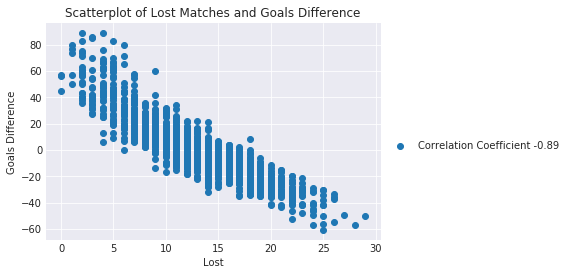

In [40]:
# calculate the correlation coefficient
corr = np.round(df['lost'].corr(df['goals_difference']), decimals=2)

# plot the scatter
plt.scatter(df['lost'], df['goals_difference'], label="Correlation Coefficient {}".format(corr));
plt.title('Scatterplot of Lost Matches and Goals Difference')
plt.xlabel('Lost')
plt.ylabel('Goals Difference')
plt.legend()
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.show();

With a correlation coefficient of `-0.89`, this scatter plot shows a strong, negative, linear relationship between how many matches a team lost and the goals difference. This means that if a team losses many games, the goals difference is smaller. 

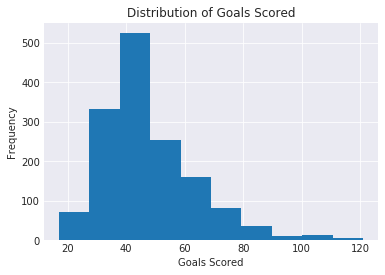

In [41]:
# plot the goals scored histogram
plt.hist(df['goals_scored'])
plt.title('Distribution of Goals Scored')
plt.xlabel('Goals Scored')
plt.ylabel('Frequency')

plt.show;

This histogram shows the distribution of scored goals from all the dataset. We can see the distribution is right skewed with data ranging from 17 to 121. 

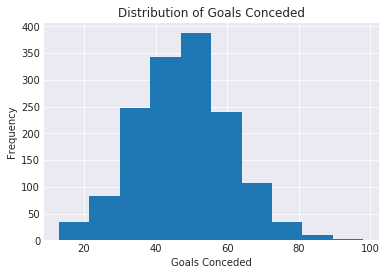

In [42]:
# plot the goals scored histogram
plt.hist(df['goals_conceded'])
plt.title('Distribution of Goals Conceded')
plt.xlabel('Goals Conceded')
plt.ylabel('Frequency')

plt.show;

This histogram show the distribution of received goals from all the dataset. We can see the distribution is normal with data ranging from 13 to 98. 

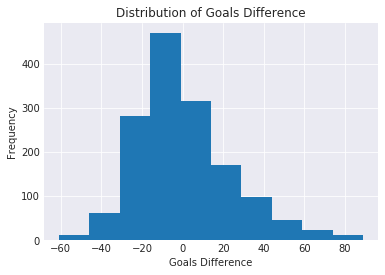

In [43]:
# plot the goals scored histogram
plt.hist(df['goals_difference'])
plt.title('Distribution of Goals Difference')
plt.xlabel('Goals Difference')
plt.ylabel('Frequency')

plt.show;

This histogram show the distribution of goals difference from all the dataset. We can see that data is ranging from -61 to 89. 

#### Case study Belgium

In [44]:
# view the first row of the dataset
df.head(1)

,country,league,match_season,team,game_played,points,won,draw,lost,goals_scored,goals_conceded,goals_difference
0,Belgium,Belgium Jupiler League,2015/2016,Club Brugge KV,30,64,21,1,8,64,30,34


In [45]:
countries = df.country.unique()
leagues = df.league.unique()
match_seasons = df.match_season.unique()
countries, leagues, match_seasons

(array(['Belgium', 'England', 'France', 'Germany', 'Italy', 'Netherlands',
        'Poland', 'Portugal', 'Scotland', 'Spain', 'Switzerland'], dtype=object),
 array(['Belgium Jupiler League', 'England Premier League',
        'France Ligue 1', 'Germany 1. Bundesliga', 'Italy Serie A',
        'Netherlands Eredivisie', 'Poland Ekstraklasa',
        'Portugal Liga ZON Sagres', 'Scotland Premier League',
        'Spain LIGA BBVA', 'Switzerland Super League'], dtype=object),
 array(['2015/2016', '2014/2015', '2012/2013', '2011/2012', '2010/2011',
        '2009/2010', '2008/2009', '2013/2014'], dtype=object))

In [46]:
df.groupby(['country', 'league', 'match_season'], as_index=False).max().head()

,country,league,match_season,team,game_played,points,won,draw,lost,goals_scored,goals_conceded,goals_difference
0,Belgium,Belgium Jupiler League,2008/2009,Tubize,34,77,24,12,21,75,77,45
1,Belgium,Belgium Jupiler League,2009/2010,Standard de Liège,28,69,22,11,20,62,58,42
2,Belgium,Belgium Jupiler League,2010/2011,Standard de Liège,30,65,19,12,19,64,58,38
3,Belgium,Belgium Jupiler League,2011/2012,Standard de Liège,30,67,20,13,20,63,61,35
4,Belgium,Belgium Jupiler League,2012/2013,Waasland-Beveren,30,67,20,12,22,69,65,42


### Group the Dataset
- by `['country', 'league', 'match_season', 'team']` for total `['points', 'goals_difference']`

In [47]:
# group the data by the number of points goals_difference  
df_points = df.groupby(['country', 'league', 'match_season', 'team'], as_index=False)['points', 'goals_difference'].sum()
# df belgium 2008/2009
df_belgium = df_points[df_points['country'] == 'Belgium']

### #1 Filter the data by country

Function description:  `filter_country` function will take as an argument a country from the data set. It first uses the `df_points` dataframe which is the original data frame grouped by `country`, `league`, `match_season`, `team` with the sum for `points`, `goals_difference`. It returns a filtered dataframe by country

In [48]:
def filter_country(country):
    df_country = df_points[df_points['country'] == country]
    # sorting the data
    df_country = df_country.sort_values(by=['match_season', 'points', 'goals_difference'], ascending=False)
    return df_country

In [49]:
# Belgium filtered data
df_belgium = filter_country('Belgium')

# save the datasets to csv
df_belgium.to_csv('df_belgium.csv', index=False)

# load dataset 
df_belgium = pd.read_csv('df_belgium.csv')

df_belgium.head()

,country,league,match_season,team,points,goals_difference
0,Belgium,Belgium Jupiler League,2015/2016,Club Brugge KV,64,34
1,Belgium,Belgium Jupiler League,2015/2016,KAA Gent,60,27
2,Belgium,Belgium Jupiler League,2015/2016,RSC Anderlecht,55,22
3,Belgium,Belgium Jupiler League,2015/2016,KV Oostende,49,11
4,Belgium,Belgium Jupiler League,2015/2016,KRC Genk,48,12


### #2 Get the name for the country, league, match season of the data filtered by country

Function description: `country_details` takes as argument the filtered dataframe and returns the name for `country`, `league`, `match_season`

In [50]:
def country_details(df_country):
    country = df_country['country'].unique()
    league = df_country['league'].unique()
    match_season = df_country['match_season'].unique()
    return country, league, match_season

In [51]:
country, league, match_season = country_details(df_belgium)
country, league, match_season

(array(['Belgium'], dtype=object),
 array(['Belgium Jupiler League'], dtype=object),
 array(['2015/2016', '2014/2015', '2013/2014', '2012/2013', '2011/2012',
        '2010/2011', '2009/2010', '2008/2009'], dtype=object))

### #3 Get the data for plotting top 5 teams and last 3 teams
Function decription: `filter_country_plot` function takes two arguments as input: the filtered data frame and the season years. It returns a numPy array for each: top 5 teams, top 5 points, top 5 goals differences, last 3 teams, last 3 points, last 3 goals_differences;

In [52]:
def filter_country_plot(df_country, season):
    country, league, match_season = country_details(df_country)
    
    # initialize values 
    team = []
    points = []
    goals_df = []
    
    for index, row in df_country.iterrows():
            if row['match_season'] == season:
                # append values
                team.append(row['team'])
                points.append(row['points'])
                goals_df.append( row['goals_difference'])
    
    # convert list to NumPy array            
    teams = np.array(team)
    points = np.array(points)
    goals_df = np.array(goals_df)   

    # get the top 5 values
    top_5_teams = teams[:5]
    top_5_points = points[:5]
    top_5_goals_df = goals_df[:5]

    # get the last 3 values
    last_3_position = len(teams) - 3
    last_3_teams = teams[last_3_position :]
    last_3_points = points[last_3_position :]
    last_3_goals_df = goals_df[last_3_position :]
    
    return top_5_teams, top_5_points, top_5_goals_df, last_3_teams, last_3_points, last_3_goals_df

In [53]:
top_5_teams, top_5_points, top_5_goals_df, last_3_teams, last_3_points, last_3_goals_df = filter_country_plot(df_belgium, match_season[0])
top_5_teams, top_5_points, top_5_goals_df, last_3_teams, last_3_points, last_3_goals_df

(array(['Club Brugge KV', 'KAA Gent', 'RSC Anderlecht', 'KV Oostende',
        'KRC Genk'], 
       dtype='<U20'),
 array([64, 60, 55, 49, 48]),
 array([34, 27, 22, 11, 12]),
 array(['Sint-Truidense VV', 'KVC Westerlo', 'Oud-Heverlee Leuven'], 
       dtype='<U20'),
 array([30, 30, 29]),
 array([-19, -24, -11]))

### #4 Plot Five Top Teams and Last Three Teams

Function description: `plot_barh` takes four arguments as input: top 5 teams, top 5 points, top 5 goals differences and the year for the match season. It plots a horizontal bar chart for the match season for the top five teams by points and goal difference. I have also plotted the last three teams per season.

In [58]:
def plot_barh(teams, points, goals_df, season):
    width = 0.35
    ind = np.arange(len(teams))
    locations = ind + width / 2 # ytick locations
    labels = teams # ytick labels
    
    if len(teams) == 5:
        plt_title = 'Top Five Winners'
    else:
        plt_title = 'Last Three Teams'
    
    heights_points = points
    heights_gd = goals_df
    winners_points = plt.barh(ind, heights_points, width, alpha=.7, label='Points')
    winner_gd = plt.barh(ind + width, heights_gd, width, alpha=.7, label='Goals Difference')

    # title and labels
    plt.title('{} in {}, {} Match Season, {} by Points and Goals Difference'.format(plt_title, league[0], season, country[0]))
    plt.xlabel('Points/Goal differences')
    plt.ylabel('Team')
    plt.yticks(locations, labels)

    #legend
    plt.legend()

    plt.show();

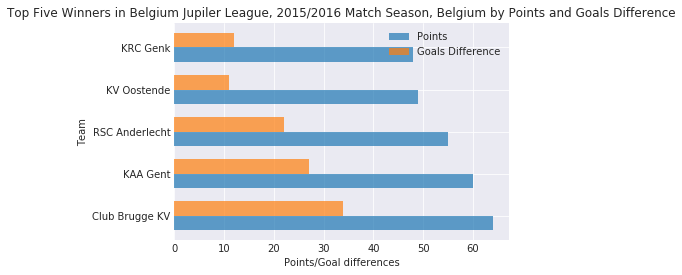

In [59]:
plot_barh(top_5_teams, top_5_points, top_5_goals_df, match_season[0])

This horizontal bar chart shows the first five teams for the 2015/2016 match season for Belgium Jupiler League by the total number of points and goals difference. I added goals difference because if two teams have the same number of points, then the one with higher goal difference takes the higher ranking. We can see that number one in 2015/2016 match is Club Brugge KV with 64 points.

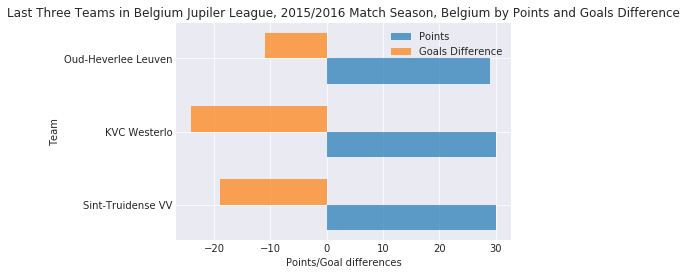

In [60]:
plot_barh(last_3_teams, last_3_points, last_3_goals_df, match_season[0])

This horizontal bar chart shows the last three teams for the 2015/2016 match season for Belgium Jupiler League by the total number of points and goals difference. I added goals difference because if two teams have the same number of points, then the one with higher goal difference takes the higher ranking. We can see that the last position is taken by Oud-Heverlee Leuven with 29 points. The next two teams: KVC Westerko and Sint-Truidense VV have the same number of points, 30. The first has smaller goals difference (-24) than the second (-19). We know that goals difference and points have strong, negative, linear relationship, with a correlation coefficient of 0.92. This means that if the goals difference is bigger, than team receives more points. Therefore, Sint-Truidense VV receives a higher ranking.

### #5 Plot for Belgium For Each Match Season

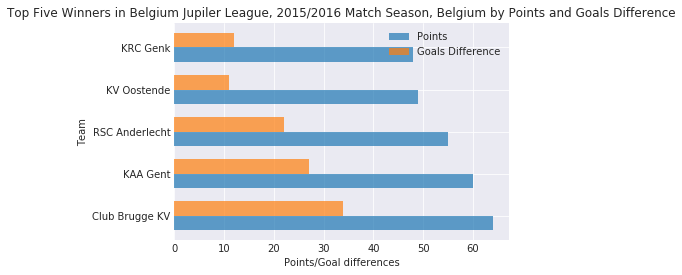

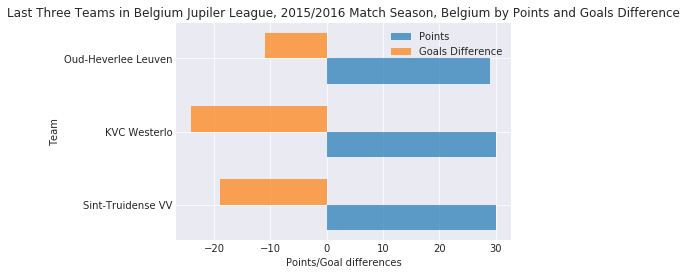

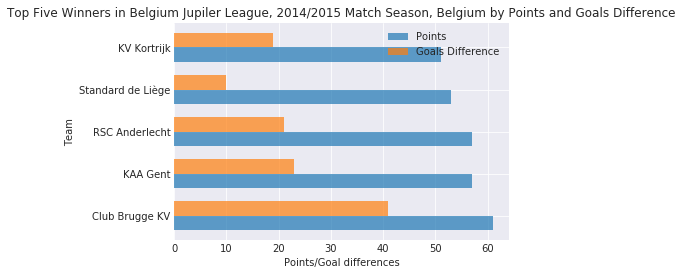

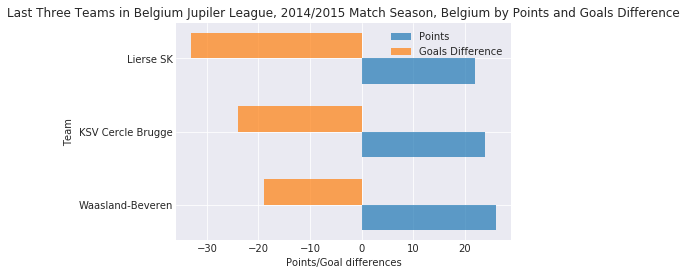

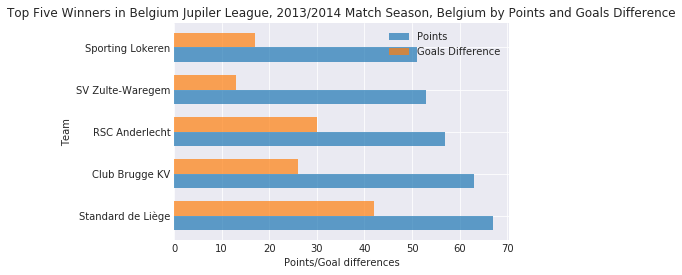

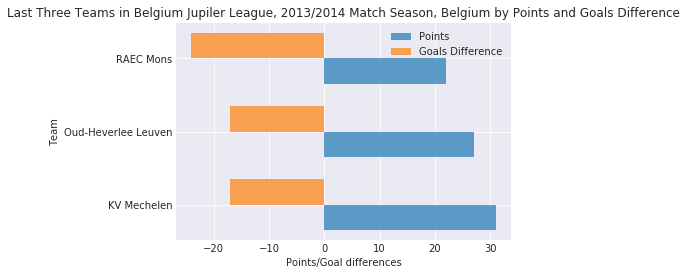

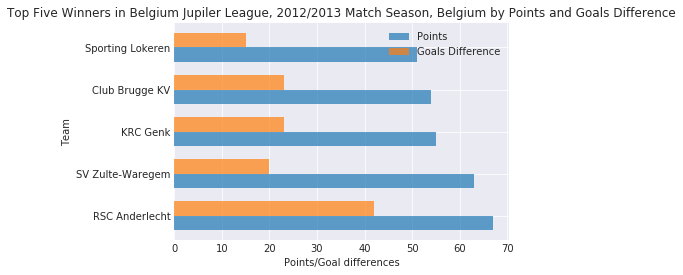

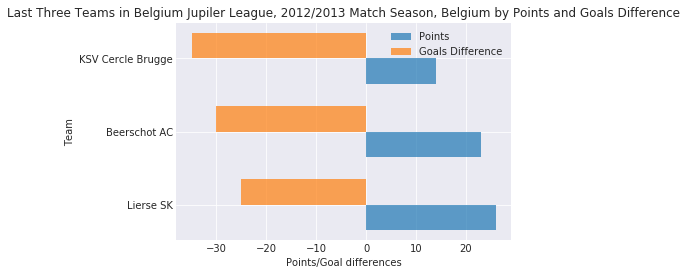

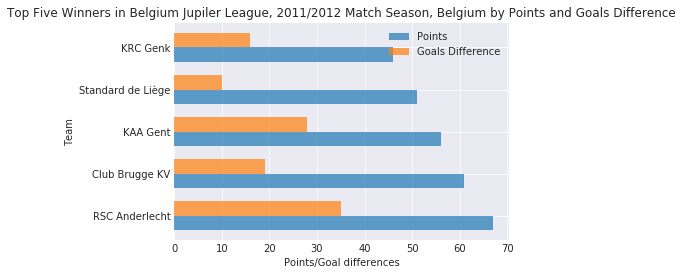

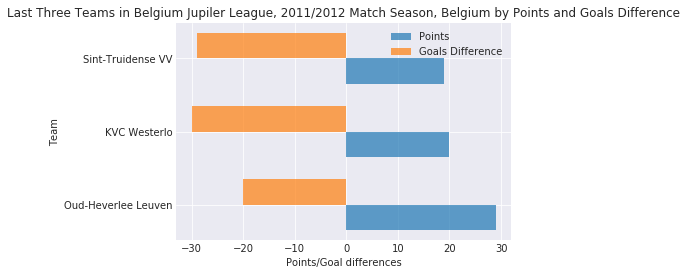

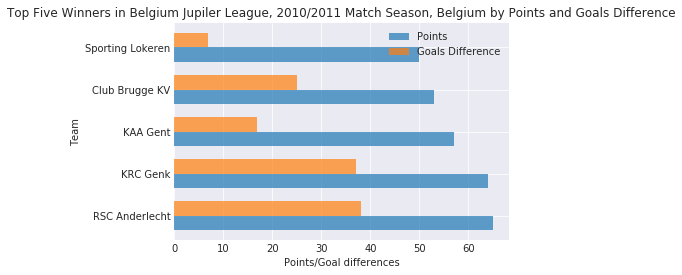

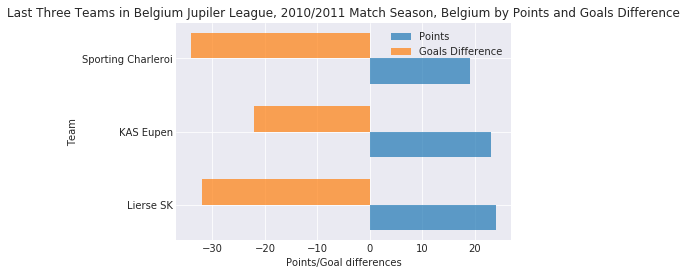

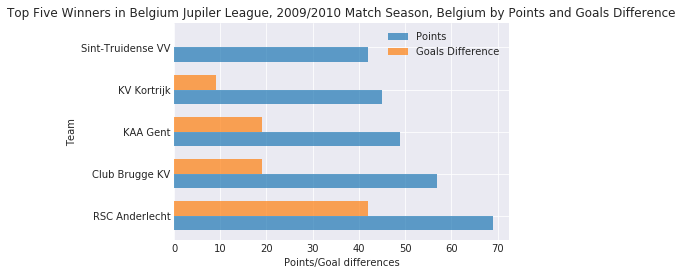

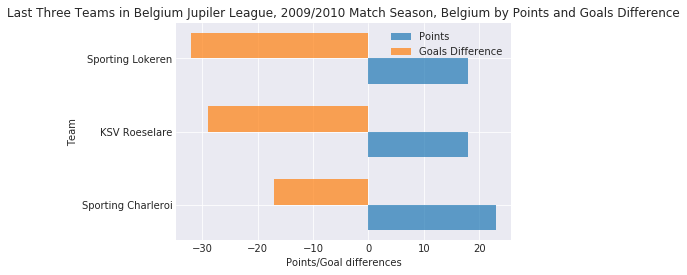

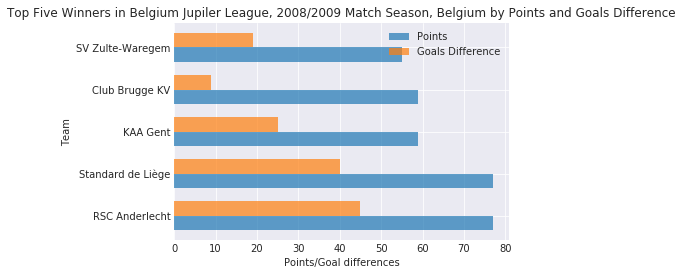

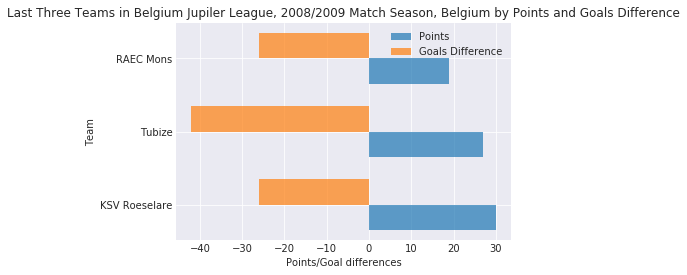

In [61]:
for season in match_season:
    top_5_teams, top_5_points, top_5_goals_df, last_3_teams, last_3_points, last_3_goals_df = filter_country_plot(df_belgium, season)
    plot_barh(top_5_teams, top_5_points, top_5_goals_df, season)
    plot_barh(last_3_teams, last_3_points, last_3_goals_df, season)

These horizontal bar charts shows the first five teams and the last three teams for all the match seasons for Belgium Jupiler League by the total number of points and goal difference. I added goal difference because if two teams have the same number of points, then the one with higher goal difference takes the higher ranking. 

## Try the same steps for Italy
### #1 Filter the data by country

In [62]:
# Italy filtered data
df_italy = filter_country('Italy')

# save the datasets to csv
df_italy.to_csv('df_italy.csv', index=False)

# load dataset 
df_italy = pd.read_csv('df_italy.csv')

df_italy.head()

,country,league,match_season,team,points,goals_difference
0,Italy,Italy Serie A,2015/2016,Juventus,91,55
1,Italy,Italy Serie A,2015/2016,Napoli,82,48
2,Italy,Italy Serie A,2015/2016,Roma,80,42
3,Italy,Italy Serie A,2015/2016,Inter,67,12
4,Italy,Italy Serie A,2015/2016,Fiorentina,64,18


### #2 Get the name for the country, league, match season of the data filtered by country

In [63]:
country, league, match_season = country_details(df_italy)
country, league, match_season

(array(['Italy'], dtype=object),
 array(['Italy Serie A'], dtype=object),
 array(['2015/2016', '2014/2015', '2013/2014', '2012/2013', '2011/2012',
        '2010/2011', '2009/2010', '2008/2009'], dtype=object))

### #3 Get the data for plotting top 5 teams and last 3 teams

In [64]:
top_5_teams, top_5_points, top_5_goals_df, last_3_teams, last_3_points, last_3_goals_df = filter_country_plot(df_italy, match_season[0])

### #4 Plot Five Top Teams and Last Three Teams

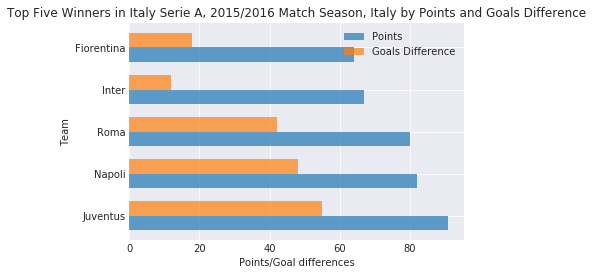

In [65]:
plot_barh(top_5_teams, top_5_points, top_5_goals_df, match_season[0])

This horizontal bar chart shows the first five teams for the 2015/2016 match season for Italy Serie A by the total number of points and goals difference. We can see that number one in 2015/2016 match is Juventus with 91 points.

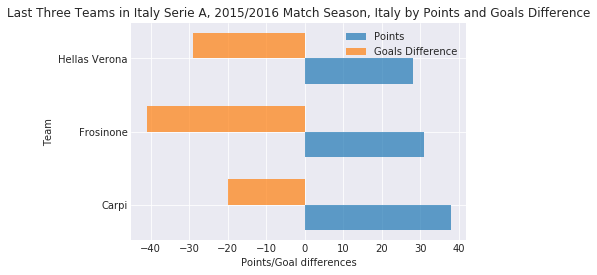

In [66]:
plot_barh(last_3_teams, last_3_points, last_3_goals_df, match_season[0])

This horizontal bar chart shows the last three teams for the 2015/2016 match season for Italy Serie A by the total number of points and goal differences. We can see that last team in 2015/2016 match is Veron with 28 points.

### #5 Plot for Italy For Each Match Season

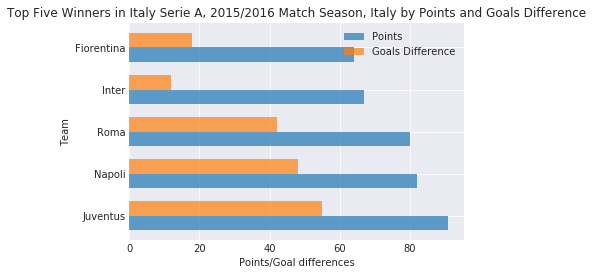

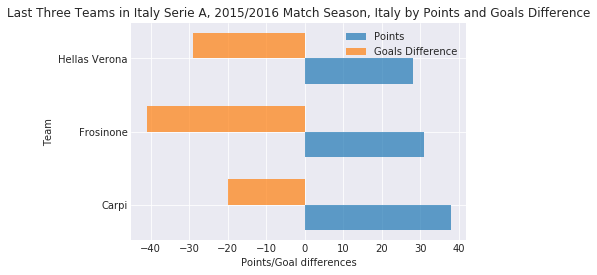

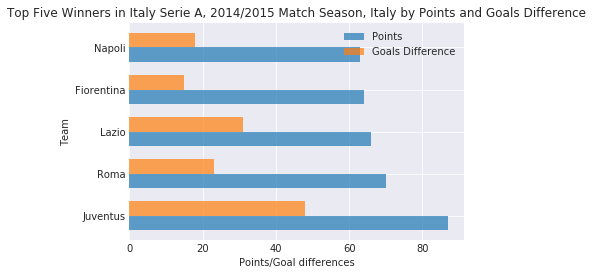

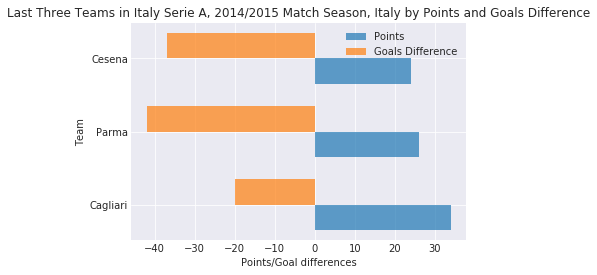

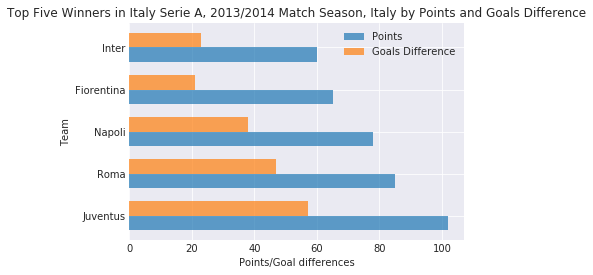

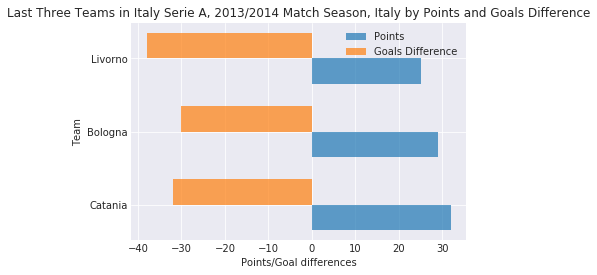

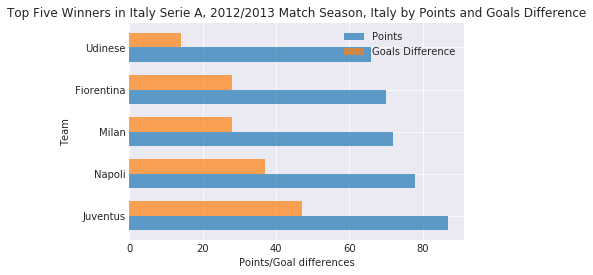

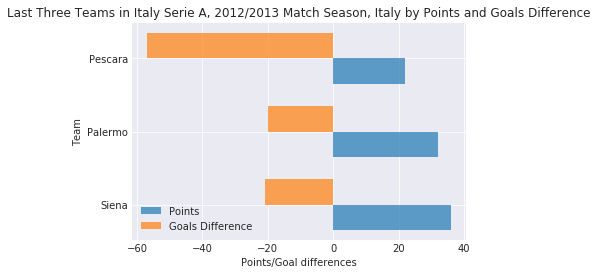

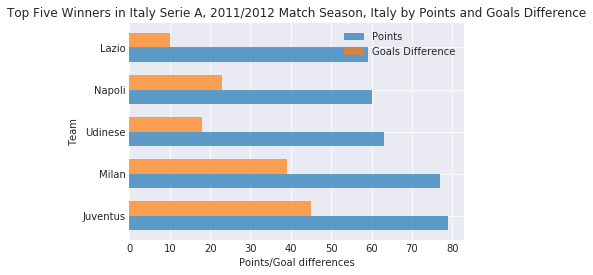

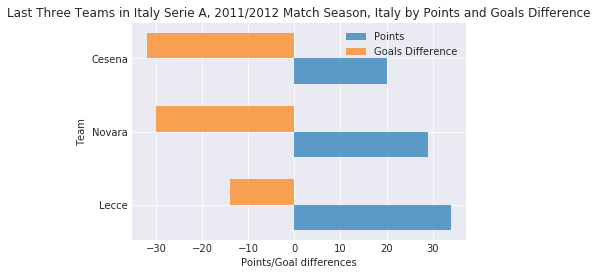

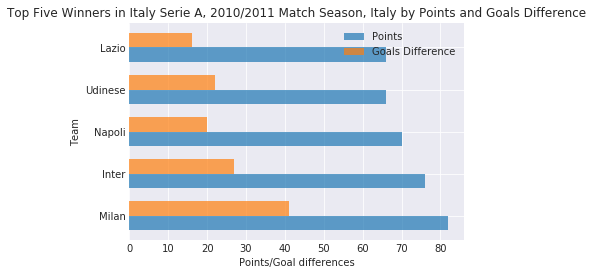

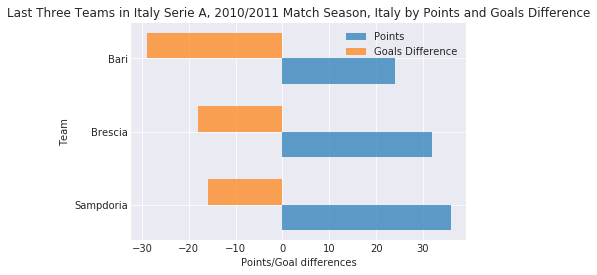

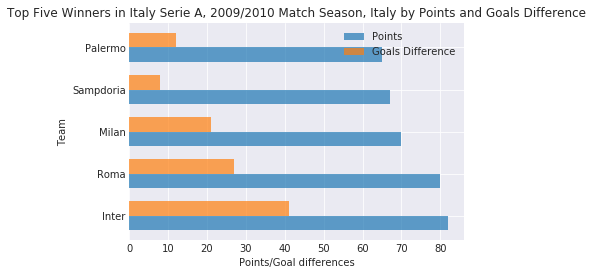

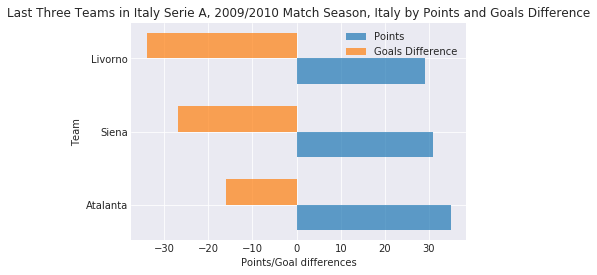

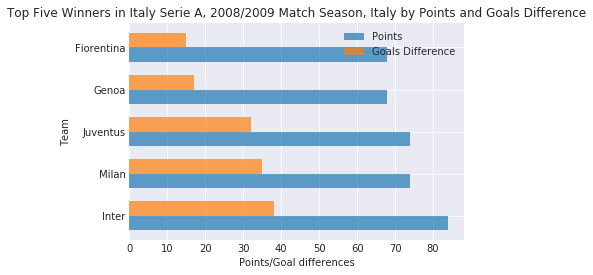

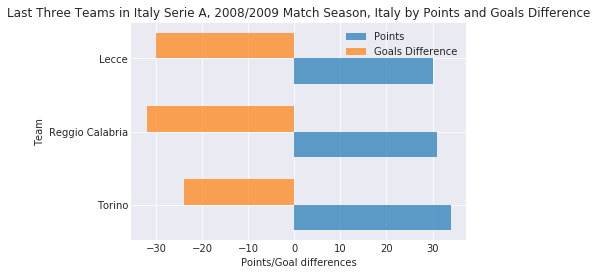

In [67]:
for season in match_season:
    top_5_teams, top_5_points, top_5_goals_df, last_3_teams, last_3_points, last_3_goals_df = filter_country_plot(df_italy, season)
    plot_barh(top_5_teams, top_5_points, top_5_goals_df, season)
    plot_barh(last_3_teams, last_3_points, last_3_goals_df, season)

These horizontal bar charts shows the first five teams and the last three teams for all the match seasons for Italy Serie A League by the total number of points and goals difference. I added goal difference because if two teams have the same number of points, then the one with higher goal difference takes the higher ranking. 

### What teams improved the most over the time period?

#### Case Study: Italy 
Plot Teams Points Over Match Season

In [68]:
df_italy.head()

,country,league,match_season,team,points,goals_difference
0,Italy,Italy Serie A,2015/2016,Juventus,91,55
1,Italy,Italy Serie A,2015/2016,Napoli,82,48
2,Italy,Italy Serie A,2015/2016,Roma,80,42
3,Italy,Italy Serie A,2015/2016,Inter,67,12
4,Italy,Italy Serie A,2015/2016,Fiorentina,64,18


### #1 Get the First 5 teams over the seasons to plot the line
Function description: `top_5_teams` function takes as argument the filtered data by country like `df_italy`. It returns the 5 top unique teams over the match seasons.

In [69]:
def top_5_teams(df_country):
    top_5_all= []
    for season in match_season:
        top_5_teams, top_5_points, top_5_goals_df, last_3_teams, last_3_points, last_3_goals_df = filter_country_plot(df_country, season)
        top_5_all.append(top_5_teams)
    top_5_all = np.unique(top_5_all)
    return top_5_all

top_5 = top_5_teams(df_italy)
top_5

array(['Fiorentina', 'Genoa', 'Inter', 'Juventus', 'Lazio', 'Milan',
       'Napoli', 'Palermo', 'Roma', 'Sampdoria', 'Udinese'], 
      dtype='<U15')

### #2 Get the Data for Plotting
Function description: `points_plot_chart` function takes two arguments as inputs: the filtered datatrame by country an the name of the team. It returns a line chart for the total points the team scored each match season. 

In [70]:
def points_plot_chart(df_country, team):
    
    # Filter database by first team
    df_top_5 = df_country[df_country['team'] == team]
    df_top_5 = df_top_5.sort_values(by=['match_season'], ascending=True)
    
    # Get Only `match_season` and `team`
    df_top_5.loc[:, ['match_season', 'points']]
    
    # plot the data
    labels = df_top_5.loc[:, 'match_season']
    heights = df_top_5.loc[:, 'points']
    plt.plot(labels, heights)

    # titles
    plt.ylabel("Total Points")
    plt.xlabel("Match Season (Years)")
    plt.xticks(labels, rotation=30)
    plt.title('{} Points by Match Season'.format(team))

    plt.show()
    
#points_plot_chart(df_italy, 'Fiorentina')

### #3 Plot the line charts

- not all data for Palermo team: they didn't play in `2013/2014`
- not all data for Sampdoria team: they didn't play in `2011/2012`


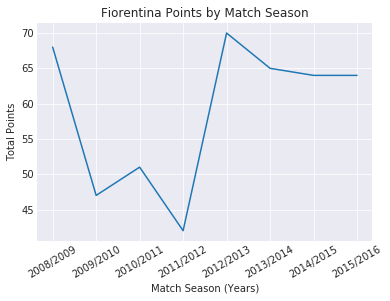

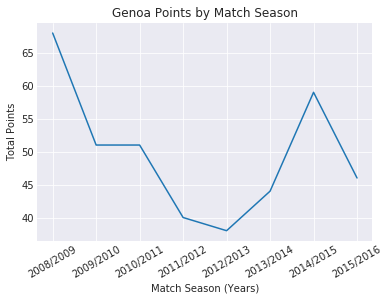

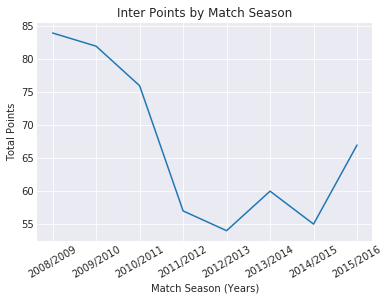

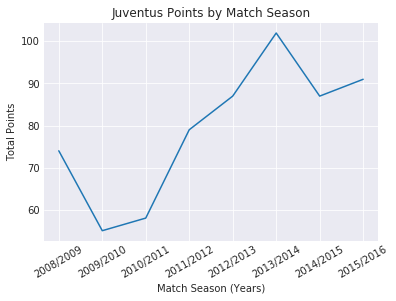

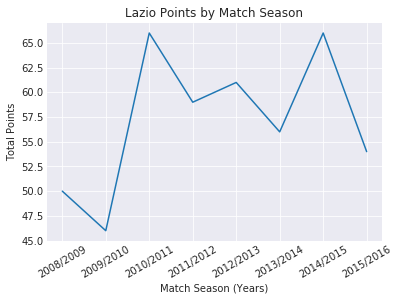

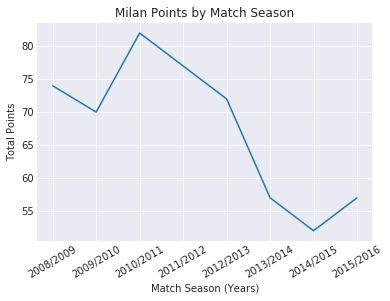

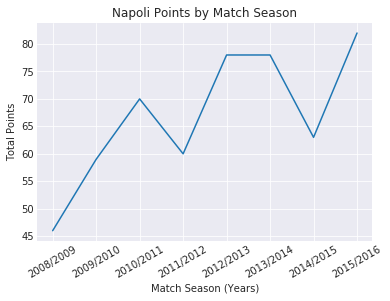

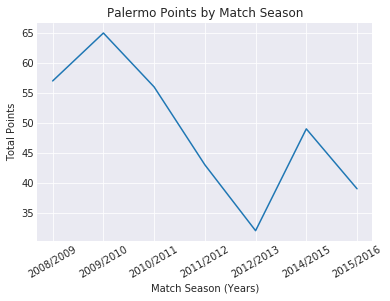

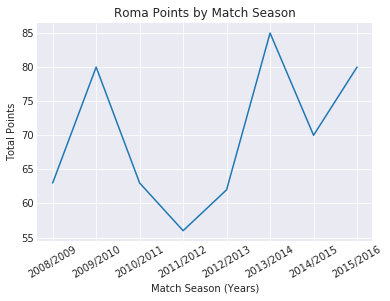

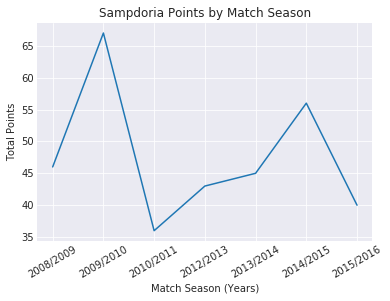

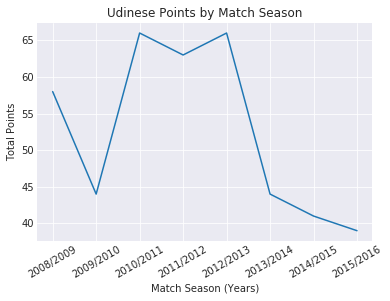

In [71]:
for team in top_5:
    points_plot_chart(df_italy, team)

These line charts shows the points evolution for each team that was ever ranked in top five winners from 2008/2009 to 2015/2016 match season, for Italy Serie A League. We can better see individual trends and evolution over the time period.  

## Compare top five teams performance over the years

In order to compare the teams performance over the years I plotted a line chart for all the top five team total points over each match season.

In [72]:
df_top_5 = df_italy[df_italy['team'].isin(top_5)]

In [73]:
top_5

array(['Fiorentina', 'Genoa', 'Inter', 'Juventus', 'Lazio', 'Milan',
       'Napoli', 'Palermo', 'Roma', 'Sampdoria', 'Udinese'], 
      dtype='<U15')

In [74]:
df_top_5 = df_top_5.groupby(['match_season', 'team'], as_index=False).sum().sort_values(by=['team', 'match_season'])
df_top_5

,match_season,team,points,goals_difference
0,2008/2009,Fiorentina,68,15
11,2009/2010,Fiorentina,47,1
22,2010/2011,Fiorentina,51,5
33,2011/2012,Fiorentina,42,-6
43,2012/2013,Fiorentina,70,28
54,2013/2014,Fiorentina,65,21
64,2014/2015,Fiorentina,64,15
75,2015/2016,Fiorentina,64,18
1,2008/2009,Genoa,68,17
12,2009/2010,Genoa,51,-4


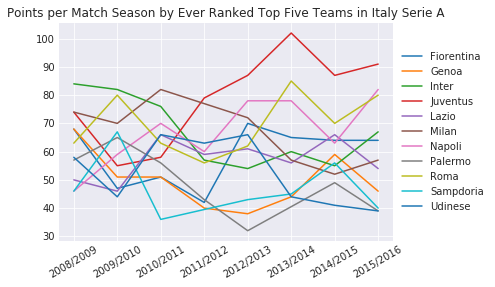

In [78]:
labels = df_top_5[df_top_5['team'] == 'Fiorentina'].loc[:, 'match_season']
plt.plot(labels, df_top_5[df_top_5['team'] == 'Fiorentina'].loc[:, 'points'], label='Fiorentina')
plt.plot(labels, df_top_5[df_top_5['team'] == 'Genoa'].loc[:, 'points'], label='Genoa')
plt.plot(labels, df_top_5[df_top_5['team'] == 'Inter'].loc[:, 'points'], label='Inter')
plt.plot(labels, df_top_5[df_top_5['team'] == 'Juventus'].loc[:, 'points'], label='Juventus')
plt.plot(labels, df_top_5[df_top_5['team'] == 'Lazio'].loc[:, 'points'], label='Lazio')
plt.plot(labels, df_top_5[df_top_5['team'] == 'Milan'].loc[:, 'points'], label='Milan')
plt.plot(labels, df_top_5[df_top_5['team'] == 'Napoli'].loc[:, 'points'], label='Napoli')
plt.plot(df_top_5[df_top_5['team'] == 'Palermo'].loc[:, 'match_season'], df_top_5[df_top_5['team'] == 'Palermo'].loc[:, 'points'], label='Palermo')
plt.plot(labels, df_top_5[df_top_5['team'] == 'Roma'].loc[:, 'points'], label='Roma')
plt.plot(df_top_5[df_top_5['team'] == 'Sampdoria'].loc[:, 'match_season'], df_top_5[df_top_5['team'] == 'Sampdoria'].loc[:, 'points'], label='Sampdoria')
plt.plot(labels, df_top_5[df_top_5['team'] == 'Udinese'].loc[:, 'points'], label='Udinese')
plt.xticks(labels, rotation=30)

#plt.figure(figsize=(8,3))
#plt.get_current_fig_manager().resize(400, 200)
plt.title('Points per Match Season by Ever Ranked Top Five Teams in Italy Serie A')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();

This line chart shows the evolution from ever ranked top five teams from 2008/2009 to 2015/2016 for Italy Serie A League. By visualizing all the teams in a single line chart we can better compare the performance and analyze trends. For example, we can see that from our samples of ever ranked top five teams, the highest number of points was gained by Juventus in 2013/2014 season, 102. On the other hand, we can see that the lowest performance from a ever ranked top five team from 2008 to 2016 is recorded by Palermo in the 2012/2013 match with 32 points. Actually, in 2012/2013 Palermo ranked 19 from 20. On the other hand, if we look at the individual “Palermo Points by Match Season” line chart, we can see that in 2009/2010 match season, Palermo got the highest number of points, 65, ranking on 5th position. 

<a id='conclusions'></a>
## Conclusions

From the above line chart we can see that the team with the maximum points is Juventus, for the 2013/2014 match season with 102 points. From the seventh position in 2009/2010 and 2010/2011 it went straight to the first position in 2011/2012 with 84 points. Juventus maintained its position in 2012/2013 with 87 points. In the next season, 2013/2014, the team gained the maximum number of points, 102. It returned to 87 points for 2014/2015 season and in the 2015/2016 match season Juventus gained 91 points, keeping the first position.

### Limitations 

The database contains multiple tables: Country, League, Match, Player, Player_Attributes, Team, Team_Attributes. This analysis focuses only on Country, League and Match tables. In order to gain more insight from the data, is required a more in depth analysis for the other tables too. Looking at the dataset, there are null values in the Team, Player_Attributes and Team_Attributes tables. The author of the dataset states that there are missing players and missing player attributes because he was not able to source the data from FIFA. 

For this particular analysis, I spotted missing and incorrect data. First, I found inconsistent data for Poland for Match season 2008/2009, team Polonia Bytom, match season 2010/2011, team Polonia Bytom and match season 2011/2012, team Widzew Łódź 60. Second, for the Belgium Match Season 2013/2014 there wasn’t enough data. Therefore, there is a chance to be more inconsistent data or maybe some missing matches.  

Another possible reason of concern is the size of the dataset.  A more exhaustive dataset to include international games, national cups, Champion's League and Europa League information is needed to make accurate predictions. 

In [79]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0